## Assignment - 4
### use python 3 for running the code

In [1]:
from __future__ import division
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/avni/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_train = pd.read_csv('ex4_train.csv') 

#### one-hot encoding

In [3]:
def one_hot_encoding(input_data):
    
    y_category = ['0','1','2','3','4','5','6','7','8','9']
    df = pd.DataFrame({'y': y_category})
    df_one_hot = pd.get_dummies(input_data['y'], df) #using dummies to get one-hot encoding
    y = df_one_hot.as_matrix() #modifying y to numpy array   

    return y   

#### split training and testing data

In [4]:
def split_data():
    data_train = pd.read_csv('ex4_train.csv') #loading data
    data_train = data_train.drop(['Unnamed: 0'],axis=1) 
    X_train = data_train.iloc[:,0:400] 
    m = X_train.shape[0] #m = 3500
    y_train = data_train.iloc[:,-1]
    y_train_one_hot = one_hot_encoding(data_train) #one-hot-encoded y
    
    data_test = pd.read_csv('ex4_test.csv')
    data_test = data_test.drop(['Unnamed: 0'],axis=1) 
    X_test = data_test.iloc[:,0:400]
    y_test_one_hot = one_hot_encoding(data_test) #one_hot encoded y
    y_test = data_test.iloc[:,-1]
    
    return X_train,y_train, X_test, y_test, m, y_train_one_hot, y_test_one_hot

In [5]:
X_train, y_train ,X_test, y_test, m , y_train_one_hot, y_test_one_hot = split_data() #getting split data
X = X_train
Y = y_train_one_hot

In [6]:
# y_indices = [0,1,2,3,4,5,6,7,8,9]
# data_train = pd.read_csv('ex4_train.csv') #loading data
# depth = 10
# y_one_hot= tf.one_hot(data_train['y'], depth)  # shape= (3500, 10)
# # y = y_one_hot

#### defining number of neurons in each layer

In [7]:
input_layer_shape = 400
h1_shape = 100
h2_shape = 30
output_layer_shape = 10

#### xavier initialization

In [8]:
def xavier_initialization(input_layer_shape, output_layer_shape , h1_shape, h2_shape):
#     tf.reset_default_graph()
    
    seed = 1
    "Setting Random Seed = 1"
    tf.set_random_seed(seed)
    
    W1 = tf.get_variable("W1", shape=(input_layer_shape, h1_shape ), initializer=tf.contrib.layers.xavier_initializer())
    
    b1 = tf.Variable(tf.zeros(h1_shape))
    
    W2 = tf.get_variable("W2", shape=(h1_shape, h2_shape), initializer=tf.contrib.layers.xavier_initializer())
    
    b2 = tf.Variable(tf.zeros(h2_shape))
    
    W3 = tf.get_variable("W3", shape=( h2_shape , output_layer_shape), initializer=tf.contrib.layers.xavier_initializer())
    
    b3 = tf.Variable(tf.zeros(output_layer_shape))
    
      
    return W1, b1, W2, b2, W3, b3
# shape : W1(400, 100)   W2(100, 30)  W3(30,10)  b1(100, 1)   b2(30, 1)  b3(10,1)

In [9]:
W1, b1, W2, b2, W3, b3 = xavier_initialization(input_layer_shape = 400, output_layer_shape = 10, h1_shape = 100, h2_shape = 30)

#### placeholders

In [10]:
def placeholders():
    # tf.reset_default_graph()
    n_input= X_train.shape[1]
    n_classes = 10
  
    x = tf.placeholder(shape = [None, 400], dtype= tf.float32, name= 'x')
 
    y = tf.placeholder(shape= [None, 10], dtype= tf.float32, name = 'y')
    
#     mat = X_test.as_matrix()
    x_test = tf.placeholder(shape = [1500,400], dtype=tf.float32, name= 'x_test')
    y_test = tf.placeholder(shape= [1500, 10], dtype= tf.float32, name = 'y_test')
    # # Dropout on hidden layers
    keep_prob = tf.placeholder("float")
    return x, y, keep_prob,x_test,y_test

In [11]:
x, y, keep_prob, x_test, y_test = placeholders()

#### forward propagation with dropout -: Neural Network with 2 hidden layers

In [12]:
def forward_propagation_with_dropout(x, W1, b1, W2, b2, W3, b3 ):
    # 1st Hidden layer with dropout and relu activation
    h1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    h1_dropout = tf.nn.dropout(h1, keep_prob)

    # 2nd Hidden layer with dropout and relu activation
    h2 = tf.nn.relu(tf.matmul(h1_dropout, W2) + b2)
    h2_dropout = tf.nn.dropout(h2, keep_prob)

    # sigmoid on last layer
    logits = tf.nn.sigmoid(tf.matmul(h2_dropout, W3) + b3)
    
    return logits


In [13]:
logits = forward_propagation_with_dropout(x, W1, b1, W2, b2, W3, b3)

#### cost function

In [14]:
def cost(logits):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y)) 
    # placeholder y is labels
    return loss

In [15]:
loss = cost(logits)

#### optimizer

In [16]:
def optimizer_compute(loss):
    learn_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learn_rate).minimize(loss)
    return optimizer

In [17]:
optimizer = optimizer_compute(loss)

#### accuracy

In [18]:
def accuracy(y_pred, y_true):
    return (100.0 * np.sum(np.argmax(y_pred, 1) == np.argmax(y_true, 1))/ y_pred.shape[0])

In [19]:
y_float= np.float32(y_train_one_hot)
X_float = np.float32(X)
y_test_float = np.float32(y_test_one_hot)
X_test_float = np.float32(X_test)

In [20]:
train_predictions = tf.nn.softmax(logits)

In [21]:
## test data
logits_test = forward_propagation_with_dropout(x_test, W1, b1, W2, b2, W3, b3)
test_predictions = tf.nn.softmax(logits_test)

#### Neural network with 2 hidden layers and dropout

In [22]:
def deep_neural_network(probability):
    epochs = 5000
    with tf.Session() as sess:

        sess.run(tf.global_variables_initializer())
        print('Initialized')
        for e in range(epochs):

            op, l, predictions_train = sess.run([optimizer, loss, train_predictions], feed_dict={x: X_float, y: y_float, keep_prob :probability})


        print("accuracy: {:.1f}".format(accuracy(predictions_train, y_train_one_hot)))
        train_acc = accuracy(predictions_train, y_train_one_hot)
        predictions_test = test_predictions.eval(feed_dict = {x_test: X_test_float, y_test: y_test_float, keep_prob : 1.0})

        print("test accuracy: {:.1f}".format(accuracy( predictions_test ,y_test_one_hot)))
        test_acc = accuracy( predictions_test ,y_test_one_hot)
        return train_acc, test_acc
        

                

#### Optimization and prediction with different dropouts 

In [23]:
probab= [0.3, 0.6, 0.9]
train_acc_list = []
test_acc_list = []
for p in probab:
    print ("probability = ", p)
    train_acc, test_acc = deep_neural_network(p)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    

probability =  0.3
Initialized
accuracy: 75.3
test accuracy: 81.7
probability =  0.6
Initialized
accuracy: 98.7
test accuracy: 93.0
probability =  0.9
Initialized
accuracy: 99.7
test accuracy: 94.1


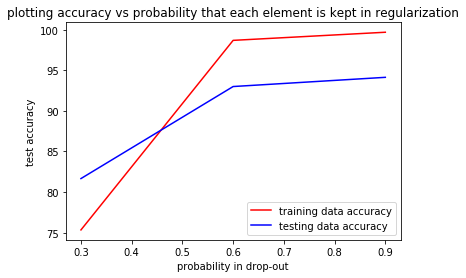

In [24]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_title("plotting accuracy vs probability that each element is kept in regularization")

ax.set_xlabel("probability in drop-out")
ax.set_ylabel("test accuracy")

plt.plot(probab, train_acc_list, 'r', label='training data accuracy')
plt.plot(probab, test_acc_list, 'b', label='testing data accuracy')

ax.legend()
plt.show()

Best accuracy is achieved with probability that each element is kept= 0.9 and learning rate = 0.001 with 5000 iterations
##### Best Test accuracy = 94.1%